In [220]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
data = pd.read_csv("./Data/featuresfloatv2.csv")
data.loc[data.account_type =='human','account_type']=1
data.loc[data.account_type =='bot','account_type']=0
# 'fake_follower',,'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM','12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM'
data=data.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week','account_type']]
x=data.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore']]
# ,'avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week'


y = data.account_type.values.tolist()
data

,verified,statuses,location,date_joined,most_recent_post,following,followers,likes,lists,tweet_language,tweets_this_week,retweet_ratio,retweeted_count,URL works,userNameScore,avg_tweets_by_hour_of_day,avg_tweets_by_day_of_week,account_type
0,0,7098,1,2009,0,166.0,125.0,12213,2,0,0.0,0.0,0.0,0,0.428571,0.000,0.000,0
1,0,270,1,2010,2022,131.0,55.0,1484,2,1,0.0,16.0,103418.0,0,0.642857,2.000,6.857,1
2,0,14302,0,2012,2023,440.0,557.0,2958,2,1,0.0,77.0,867392.0,0,0.000000,8.083,27.714,1
3,0,4585,1,2009,2023,288.0,111.0,7983,3,1,0.0,54.0,2996382.0,0,0.909091,8.167,28.000,1
4,1,15851,1,2010,2022,39.0,71644.0,20105,172,2,0.0,10.0,66477.0,-1,0.600000,8.333,28.571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,1,60100,1,2010,2023,181.0,417832.0,61532,876,1,8.0,47.0,1375535.0,1,0.714286,8.333,28.571,1
34040,1,40277,0,2010,2023,129.0,80306.0,1,182,8,0.0,0.0,15350.0,1,0.400000,8.333,28.571,1
34041,0,6679,0,2009,2022,231.0,248542.0,28,372,4,0.0,8.0,18899.0,0,0.875000,8.333,28.571,1
34042,1,2580,1,2013,2023,49.0,3383768.0,871,378,1,1.0,4.0,145792.0,1,0.277778,8.333,28.571,1


SelectKBest

In [221]:
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


# result :avg_tweets_by_day_of_week,avg_tweets_by_hour_of_day,verified ,location,date_joined, likes

               Specs        Score
0           verified  3888.302600
2           location  1744.201520
3        date_joined  1433.929373
7              likes   972.669256
11     retweet_ratio   911.753823
14     userNameScore   681.271004
6          followers   253.901910
10  tweets_this_week   241.197627
9     tweet_language   166.329859
12   retweeted_count   157.960567


Tree-based Feature Selection

[0.07425045 0.0765744  0.03526932 0.07692434 0.12841776 0.0593325
 0.06593626 0.09639928 0.04852044 0.04157755 0.03968247 0.10111442
 0.07019136 0.02738151 0.05842792]


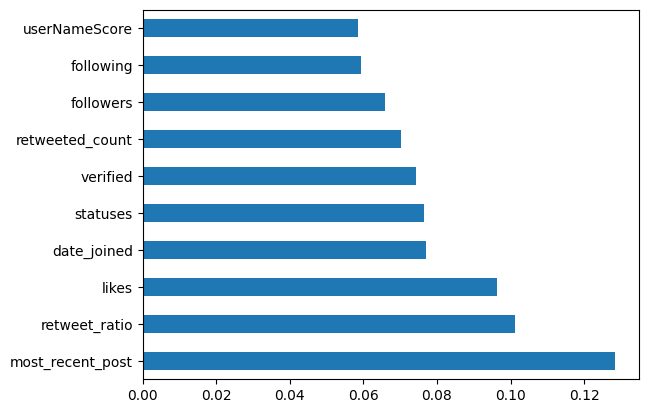

In [230]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

correlations

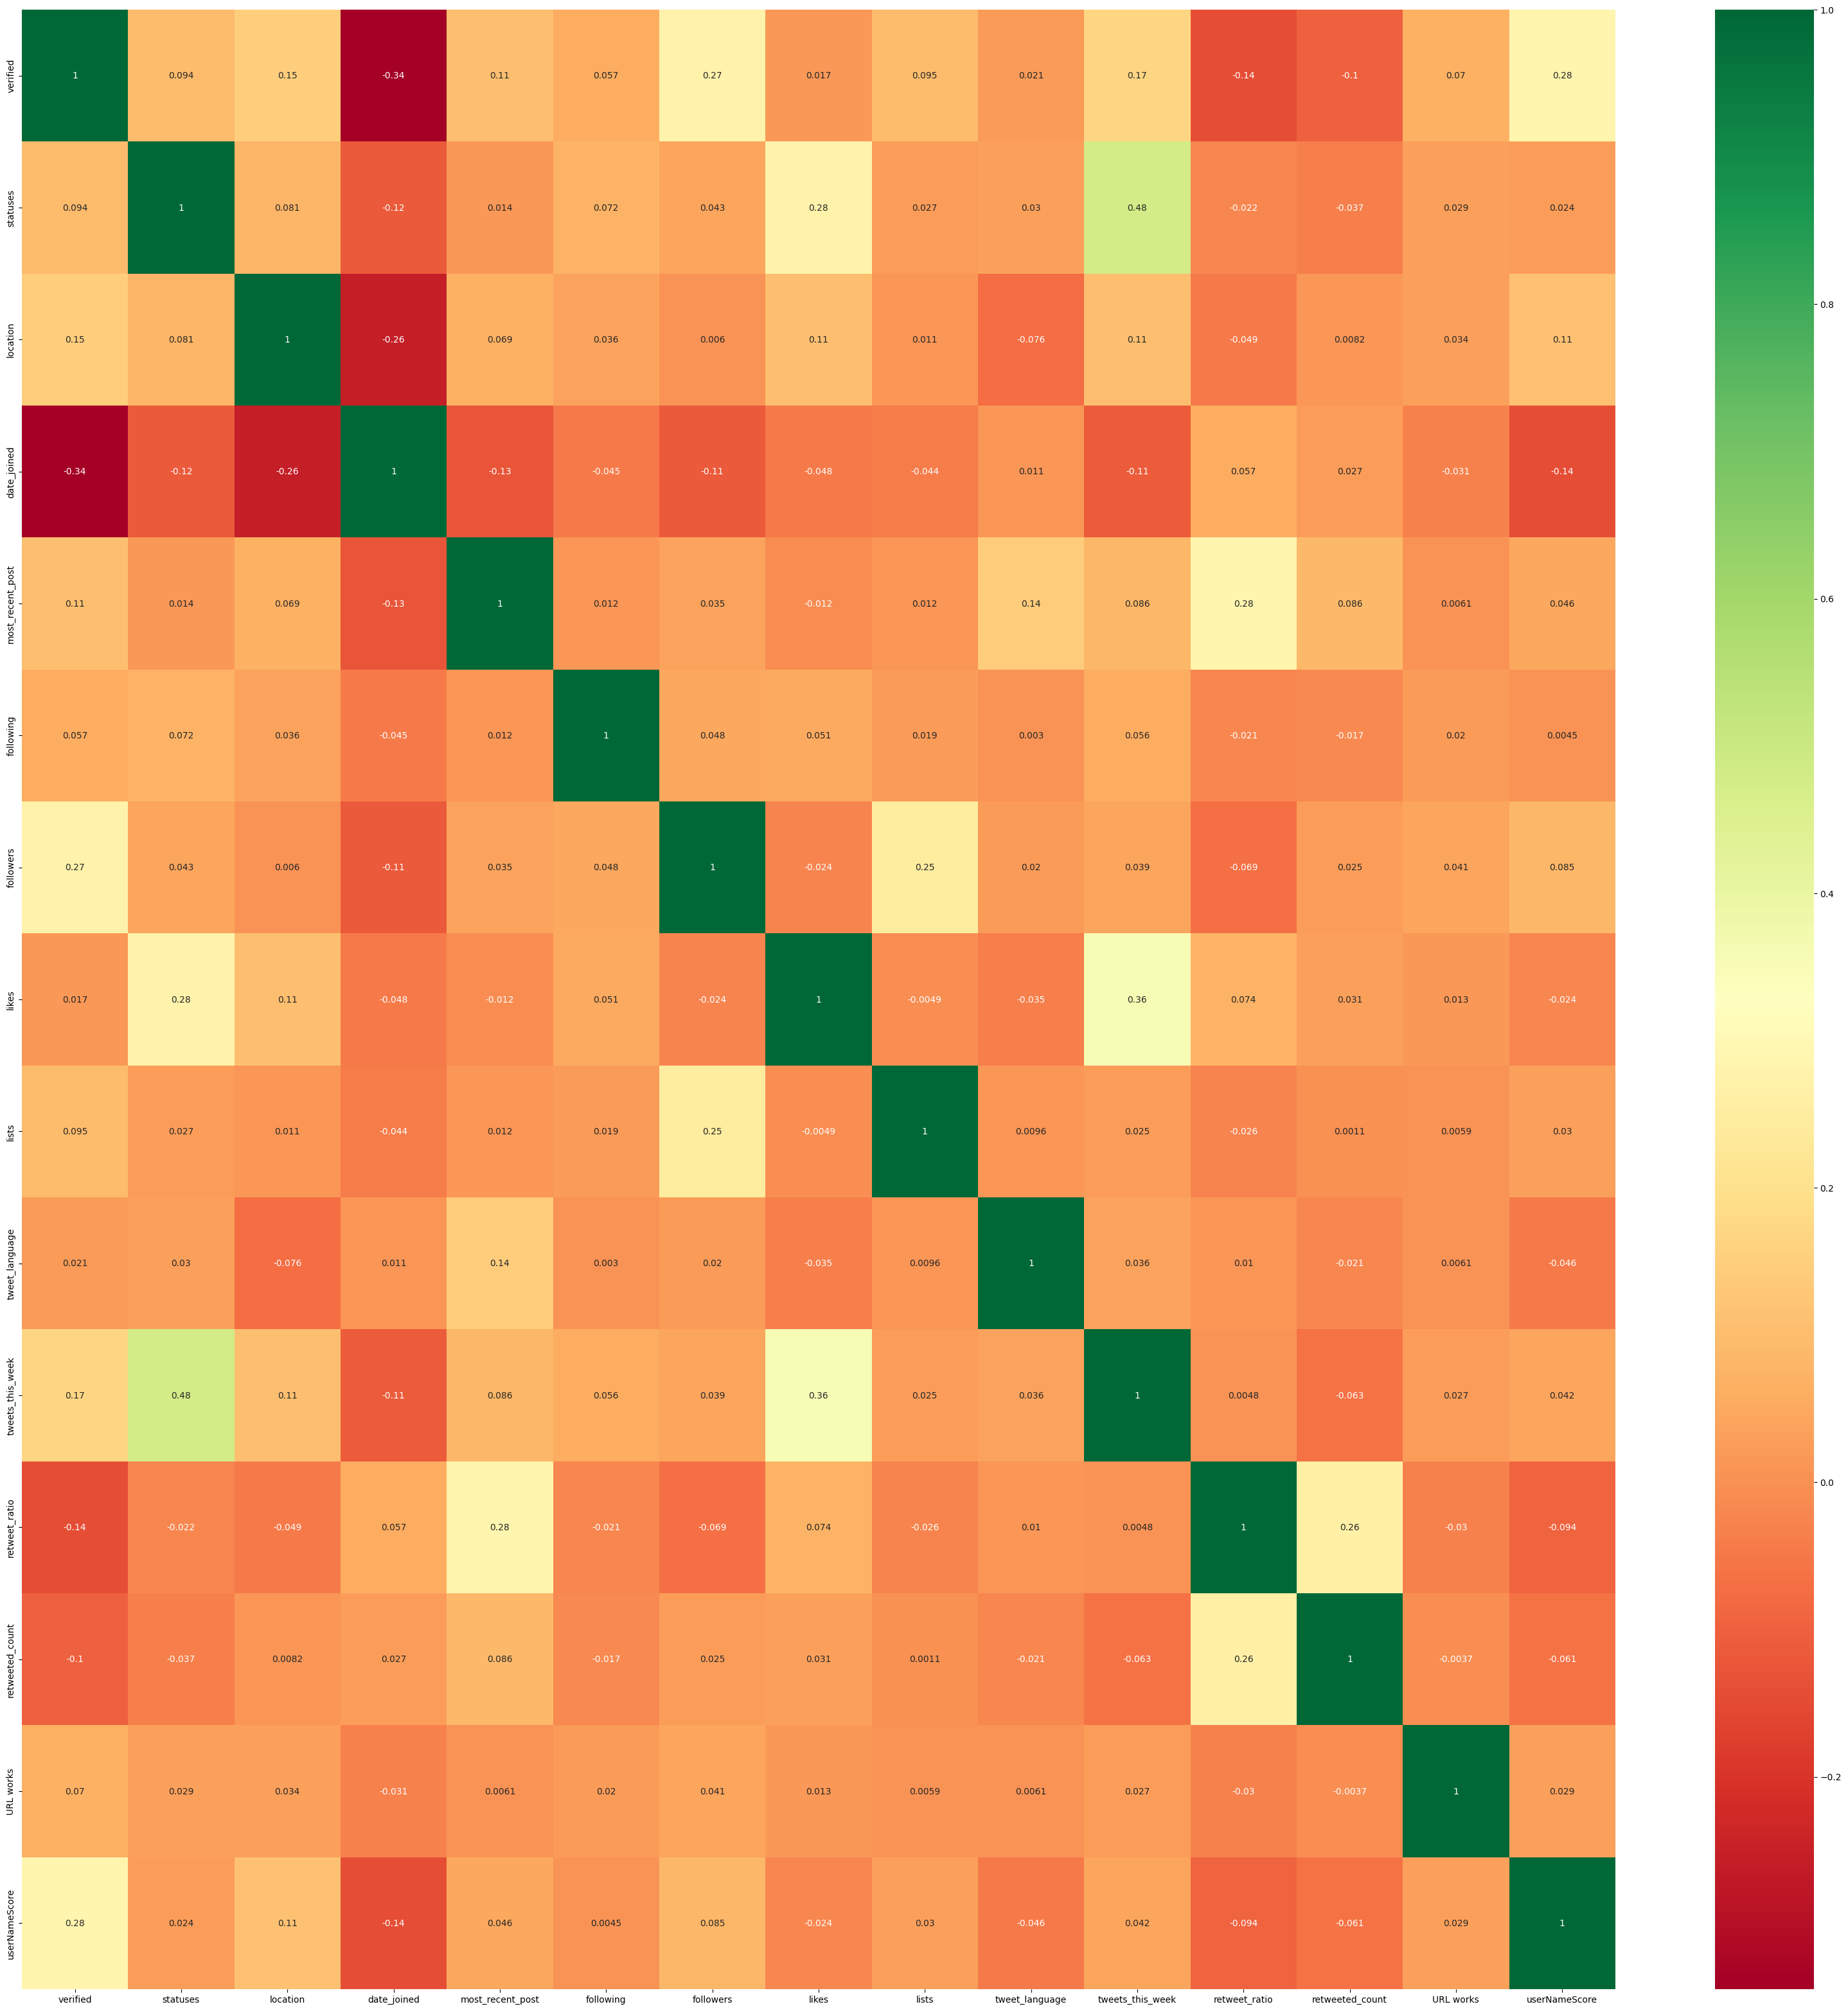

In [223]:
import pandas as pd
import numpy as npmutual_info_classif
import seaborn as sns

#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Correlation-based Feature Selection (CFS)

In [229]:
bestfeatures = SelectKBest(score_func=mutual_info_classif,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features




               Specs     Score
6          followers  0.165083
4   most_recent_post  0.139520
5          following  0.118971
7              likes  0.110656
1           statuses  0.102607
8              lists  0.092171
0           verified  0.070380
10  tweets_this_week  0.068193
11     retweet_ratio  0.066111
12   retweeted_count  0.065654


Recursive Feature Elimination (RFE)

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_sequential_feature_selection

estimator = LogisticRegression(solver='liblinear')
selector = RFE(estimator, n_features_to_select=10)
selected_features = selector.fit(x, y)

x.loc[:, selected_features.support_]

,verified,location,date_joined,most_recent_post,lists,tweet_language,tweets_this_week,retweet_ratio,URL works,userNameScore
0,0,1,2009,0,2,0,0.0,0.0,0,0.428571
1,0,1,2010,2022,2,1,0.0,16.0,0,0.642857
2,0,0,2012,2023,2,1,0.0,77.0,0,0.000000
3,0,1,2009,2023,3,1,0.0,54.0,0,0.909091
4,1,1,2010,2022,172,2,0.0,10.0,-1,0.600000
...,...,...,...,...,...,...,...,...,...,...
34039,1,1,2010,2023,876,1,8.0,47.0,1,0.714286
34040,1,0,2010,2023,182,8,0.0,0.0,1,0.400000
34041,0,0,2009,2022,372,4,0.0,8.0,0,0.875000
34042,1,1,2013,2023,378,1,1.0,4.0,1,0.277778


Principal Component Analysis (PCA)

In [217]:
from sklearn.decomposition import PCA

# Reduce the dimensionality using PCA
pca = PCA(n_components=10)
X_new = pca.fit_transform(x)

print(pd.DataFrame(pca.components_.T, index=x.columns))
# Print the selected features

# print(pd.DataFrame(pca.components_,columns=x.columns))

                                      0             1             2  \
verified                   4.074911e-08 -4.946267e-08  4.040355e-07   
statuses                   1.247811e-03 -3.319501e-03  9.722543e-01   
location                   1.080417e-09  4.356921e-09  5.616240e-07   
date_joined               -1.255441e-07  1.010263e-07 -4.219060e-06   
most_recent_post           6.052487e-06  4.446351e-05  8.007958e-05   
following                  8.325381e-04 -9.729339e-04  6.376456e-02   
followers                  9.999539e-01 -9.328353e-03 -1.208552e-03   
likes                     -4.035632e-04  1.610852e-03  2.250168e-01   
lists                      1.609652e-03 -1.145482e-04  3.607816e-03   
tweet_language             4.728378e-08 -1.567684e-07  1.825405e-06   
tweets_this_week           5.354370e-07 -2.652821e-06  2.319786e-04   
retweet_ratio             -7.346888e-07  8.485270e-06 -3.746764e-07   
retweeted_count            9.334184e-03  9.999492e-01  2.916253e-03   
URL wo

     *** Correlation-based Feature Selection (CFS)
           
followers most_recent_post  following likes statuses lists verified tweets_this_week  retweet_ratio retweeted_count 

***
 verified  location  date_joined  likes   retweet_ratio  userNameScore followers  tweets_this_week   tweet_language  retweeted_count 


***Recursive Feature Elimination (RFE)

verified	location	date_joined	most_recent_post	lists	tweet_language	tweets_this_week	retweet_ratio	URL works	userNameScore


***Tree-based Feature Selection

most_recent_post   retweet_ratio  likes date_joined statuses  verified  retweeted_count followers following userNameScore



verified 4
retweet_ratio 4
retweeted_count 3
most_recent_post 3
date_joined 3
likes 3
userNameScore 3
followers 3
tweets_this_week 3
location 2
tweet_language 2
following 2
statuses 2
lists 2
URL works 1




